In [2]:
from openai import OpenAI
from vllm.multimodal.utils import encode_image_base64, fetch_image

openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8001/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)

/home/cyrusleung/miniconda3/envs/vllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-30 08:30:08,466	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [5]:
model = client.models.list().data[0].id
print("Model:", model)

Model: llava-hf/llava-1.5-7b-hf


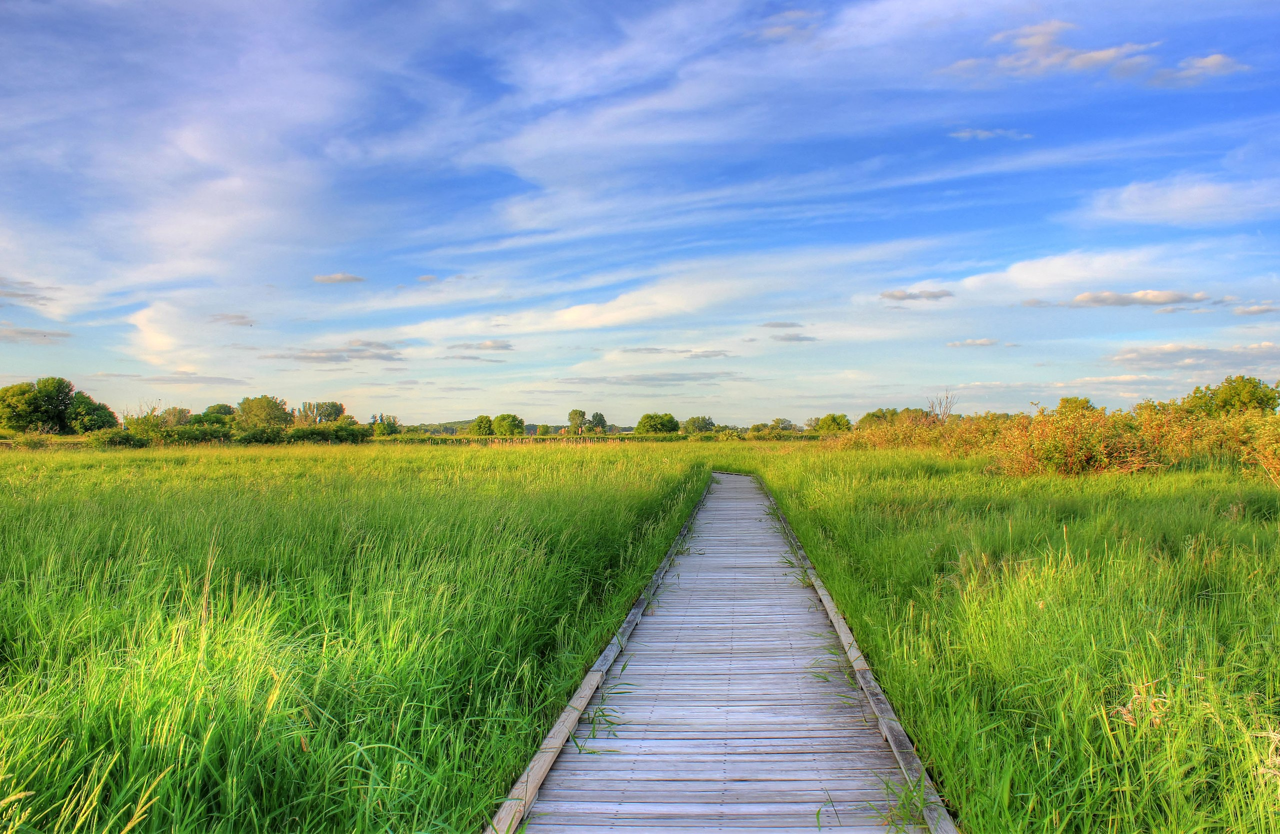

In [7]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
image = fetch_image(image_url)
display(image.resize((image.width // 2, image.height // 2)))

In [11]:
chat_response = client.chat.completions.create(
    model=model,
    messages=[{
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": image_url,
                },
            },
            {"type": "text", "text": "What is in this image?"},
        ],
    }],
    extra_body={
        "truncate_prompt_tokens": 100,
    },
)

print("Chat response:", chat_response)

InternalServerError: Internal Server Error

In [8]:
image_base64 = encode_image_base64(image)

chat_response = client.chat.completions.create(
    model=model,
    messages=[{
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpg;base64,{image_base64}",
                },
            },
            {"type": "text", "text": "What is in this image?"},
        ],
    }],
)

print("Chat response:", chat_response)


Chat response: ChatCompletion(id='chat-ce0f37805aba49e486c55607ae43985f', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Can't you just use the play button?", role='assistant', function_call=None, tool_calls=[]), stop_reason=50118)], created=1722043101, model='Salesforce/blip2-opt-2.7b', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=10, prompt_tokens=39, total_tokens=49))
